# Example to create a mask for a QAfilm distribution.

In [9]:
from image import load
from i_o import retrieve_demo_file

import matplotlib.pyplot as plt
import numpy as np

from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, erosion, dilation

In [10]:
QA_pre_path = retrieve_demo_file("QA_Pre.tif")
QA_pre = load(QA_pre_path)

QA_post_path = retrieve_demo_file("QA_Post.tif")
QA_post = load(QA_post_path)

In [11]:
grayscale = rgb2gray(QA_post.array)


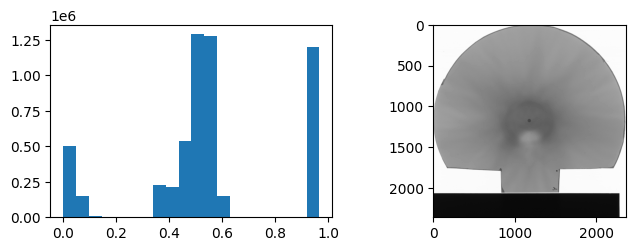

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].hist(grayscale.ravel(), bins = 20)
ax[1].imshow(QA_post.array[:,:,1], cmap = "gray")

## Remove black background

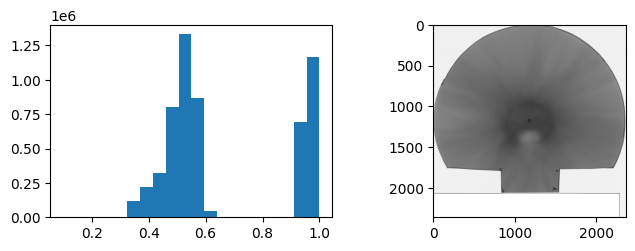

In [13]:
QA_copy = QA_post
QA_copy.array[grayscale < 0.1] = 2**16 - 1

grayscale_copy = rgb2gray(QA_copy.array)
#QA_post.array[grayscale < 0.1] = 2**16-1

fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].hist(grayscale_copy.ravel(), bins = 20)
ax[1].imshow(QA_copy.array[:,:,0], cmap = "gray")

## Threshold

In [14]:
thresh_copy = threshold_otsu(grayscale_copy)
print(thresh_copy)
binary_copy = closing(grayscale_copy < thresh_copy, square(5))
cleared_copy = clear_border(binary_copy)

# label image regions
#label_image_copy = label(cleared_copy)
label_image_copy = label(binary_copy)
label_image_copy = erosion(label_image_copy, square(24))

0.7380885254897191


### Use of "erosion" to remove borders.

Number of labels: 1


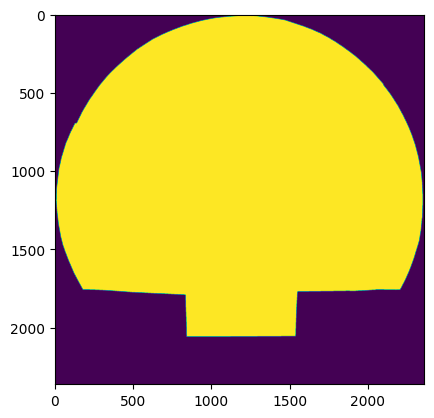

In [24]:
binary_2 = erosion(grayscale_copy < thresh_copy, square(12)) 
# The shape of the square should be based on resolution? For example, for 300 dpi 1 mm = 12.
# If we want to remove 1.5 mm, square  shape should be 18.

label_2, num = label(binary_2, return_num = True)

print(f"Number of labels: {num}")
plt.imshow(label_2)

In [ ]:
label_image_copy

0
34488.71717136687


(array([5.106000e+03, 1.246000e+03, 1.069000e+03, 1.753000e+03,
        1.952000e+03, 3.016600e+04, 2.467720e+05, 2.121540e+05,
        5.178740e+05, 1.076008e+06, 1.264892e+06, 3.530770e+05,
        1.642000e+03, 1.212000e+03, 1.116000e+03, 1.239000e+03,
        1.539000e+03, 2.315000e+03, 3.184200e+05, 1.539492e+06]),
 array([ 6177. ,  9144.9, 12112.8, 15080.7, 18048.6, 21016.5, 23984.4,
        26952.3, 29920.2, 32888.1, 35856. , 38823.9, 41791.8, 44759.7,
        47727.6, 50695.5, 53663.4, 56631.3, 59599.2, 62567.1, 65535. ]),
 <BarContainer object of 20 artists>)

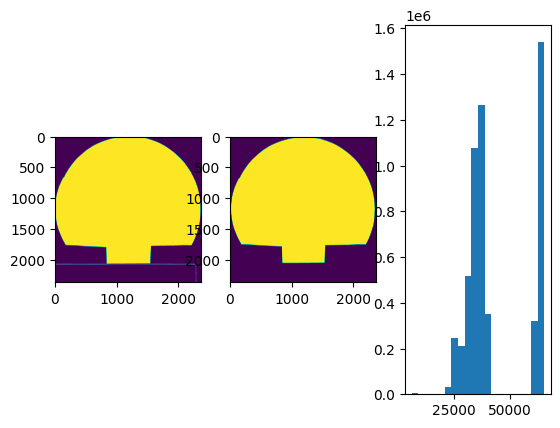

In [26]:
fig, axes = plt.subplots(ncols = 3)
ax  = axes.ravel()

ax[0].imshow(binary_copy)
ax[1].imshow(label_image_copy)

#QA_post.region_properties(label_image_copy
region = regionprops(label_image_copy, intensity_image = QA_copy.array[:,:,1])

i = 0
for prop in region:
    print(i)
    print(prop.intensity_mean)
    i += 1

ax[2].hist(QA_copy.array[:,:,1].ravel(), bins = 20)

Text(0.5, 1.0, 'label_image_copy')

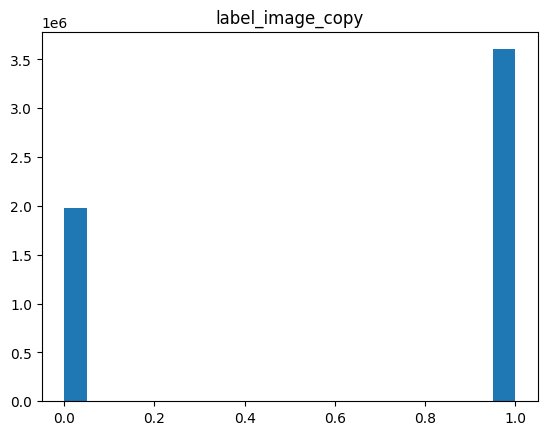

In [27]:
plt.hist(label_image_copy.ravel(), bins = 20)
plt.title("label_image_copy")

## Apply the mask

42385.0
48371


array([[48371, 48371, 48371, ..., 48371, 48371, 48371],
       [48371, 48371, 48371, ..., 48371, 48371, 48371],
       [48371, 48371, 48371, ..., 48371, 48371, 48371],
       ...,
       [48371, 48371, 48371, ..., 48371, 48371, 48371],
       [48371, 48371, 48371, ..., 48371, 48371, 48371],
       [48371, 48371, 48371, ..., 48371, 48371, 48371]], dtype=uint16)

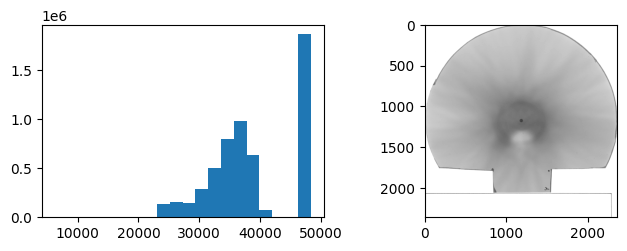

In [28]:
for prop in region:
    max_pixel = prop.intensity_max
    print(max_pixel)
#type(min_pixel)

thres = int(thresh_copy * 2**16)

QA_copy.array[QA_copy.array > thres] = int(thres)

fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].hist(QA_copy.array[:,:,1].ravel(), bins = 20)
ax[1].imshow(QA_copy.array[:,:,1], cmap = "gray")

print(thres)
QA_copy.array[:,:,1]

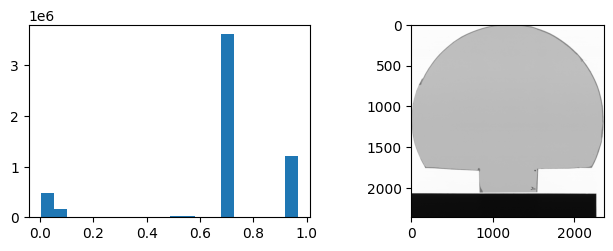

In [29]:
grayscale_pre = rgb2gray(QA_pre.array)

fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].hist(grayscale_pre.ravel(), bins = 20)
ax[1].imshow(QA_pre.array[:,:,1], cmap = "gray")

Number of labels: 1
Valor medio de pixel: 46667.61196098062
Referencia: 46761


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

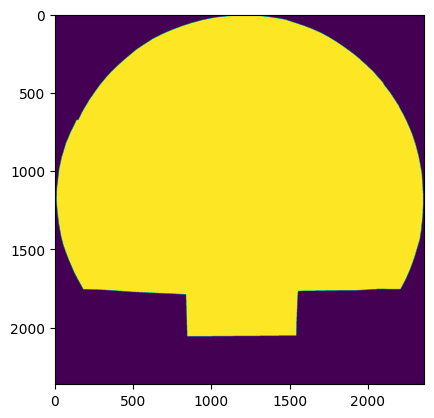

In [36]:
from skimage.util import crop

QA_pre.array[grayscale_pre < 0.1] = 2**16 - 1

grayscale = rgb2gray(QA_pre.array)
thresh = threshold_otsu(grayscale)

#binary = closing(grayscale < thresh, square(9))
binary = erosion(grayscale < thresh, square(12))
plt.imshow(binary)

#plt.hist(binary.ravel())

# label image regions
#label_image_copy = label(cleared_copy)
label_image, num = label(binary, return_num = True)
label_crop = crop(label_image, 36)
#plt.imshow(label_crop)

print(f"Number of labels: {num}")

#label_image_copy = erosion(label_image_copy, square(24))

region = regionprops(label_image, intensity_image = QA_pre.array[:,:,1])

for prop in region:
    print(f"Valor medio de pixel: {prop.intensity_mean}")
    print(f"Referencia: 46761")

binary

In [1]:
import Dosepy.dose as dp

In [6]:
dp.from_dicom("./spine.tif")

FileNotFoundError: [Errno 2] No such file or directory: './spine.tif'